In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
import mplcursors
import plotly.tools as tls


# Part 2

## 1. Bar chart

This code is changing some columns to a alarm date and arrival time format and figuring out the time difference between two of those columns. 

In [3]:

# Author-
# Ali Dadayev 



# This line changes the "Arrival DtTm" column in the DataFrame called "df" into a format that can be understood as a date and time. It does this by using the function called "pd.to_datetime()".
df['Arrival DtTm'] = pd.to_datetime(df['Arrival DtTm'])
df['Arrival DtTm'] = df['Arrival DtTm']

# This line converts the "Alarm DtTm" column of the DataFrame df to a datetime format using the pd.to_datetime() function.
df['Alarm DtTm'] = pd.to_datetime(df['Alarm DtTm'])

# It calculates the time difference between the "Arrival DtTm" column and the "Alarm DtTm" column and saves it in a new column called "Arrive time_minutes".
df['Arrive time_minutes'] = (df['Arrival DtTm'] - df['Alarm DtTm'])

# df.head()

NameError: name 'df' is not defined

This code calculates the average (mean) arrival time for a dataset. It uses the mean() method to calculate the average of the "Arrive time_minutes" column of the DataFrame df, which was created in the previous code block by subtracting the "Alarm DtTm" column from the "Arrival DtTm" column.

In [20]:

# Author-
# Ali Dadayev 


# This line calculates the average (mean) value of the "Arrive time_minutes" column of the pandas DataFrame df, and stores the result in the variable average_arrival_time.
average_arrival_time = df['Arrive time_minutes'].mean()

# This line changes the "Arrival DtTm" column in the DataFrame called "df" into a format that can be understood as a date and time. It does this by using the function called "pd.to_datetime()".
df['Arrival DtTm'] = pd.to_datetime(df['Arrival DtTm'])
df['Arrival DtTm'] = df['Arrival DtTm']

# This line converts the "Alarm DtTm" column of the DataFrame df to a datetime format using the pd.to_datetime() function.
df['Alarm DtTm'] = pd.to_datetime(df['Alarm DtTm'])

# It calculates the time difference between the "Arrival DtTm" column and the "Alarm DtTm" column and saves it in a new column called "Arrive time_minutes".
df['Arrive time_minutes'] = (df['Arrival DtTm'] - df['Alarm DtTm'])

# This line prints out a message to the console that includes the average arrival time.
# print("The average arrival time is:", average_arrival_time)



The code down below calculates the average arrival time of fire department units to emergency incidents, grouped by battalion.

In [21]:

# Author-
# Ali Dadayev 


#This code creates a new column in df called "Arrive time_minutes" that contains the difference between the "Arrival DtTm" and "Alarm DtTm" columns of df.
df['Arrive time_minutes'] = ((df['Arrival DtTm'] - df['Alarm DtTm']).dt.total_seconds() / 60.0).round(2)


# Convert to minutes and add a new column

df = df[df['Battalion'] != 'B99']
avg_arrival_time_by_battalion = df.groupby('Battalion')['Arrive time_minutes'].mean().round(2)

# This line calculates the average (mean) value of the "Arrive time_minutes" column of the pandas DataFrame df, and stores the result in the variable average_arrival_time.
average_arrival_time = df['Arrive time_minutes'].mean()

# This line changes the "Arrival DtTm" column in the DataFrame called "df" into a format that can be understood as a date and time. It does this by using the function called "pd.to_datetime()".
df['Arrival DtTm'] = pd.to_datetime(df['Arrival DtTm'])
df['Arrival DtTm'] = df['Arrival DtTm']

# This line converts the "Alarm DtTm" column of the DataFrame df to a datetime format using the pd.to_datetime() function.
df['Alarm DtTm'] = pd.to_datetime(df['Alarm DtTm'])

# It calculates the time difference between the "Arrival DtTm" column and the "Alarm DtTm" column and saves it in a new column called "Arrive time_minutes".
df['Arrive time_minutes'] = (df['Arrival DtTm'] - df['Alarm DtTm'])



#print(avg_arrival_time_by_battalion)


This code generates a bar chart using the Plotly library to visualize the average arrival time of different fire departments or "battalions" to a fire scene.

In [22]:

# Author-
# Ali Dadayev 


# Convert to minutes and add a new column
df['Arrive time_minutes'] = ((df['Arrival DtTm'] - df['Alarm DtTm']).dt.total_seconds() / 60.0).round(2)
df = df[df['Battalion'] != 'B99']
avg_arrival_time_by_battalion = df.groupby('Battalion')['Arrive time_minutes'].mean().round(2).reset_index()

# Create a bar chart with color gradient
data = [go.Bar(
            x=avg_arrival_time_by_battalion['Battalion'],
            y=avg_arrival_time_by_battalion['Arrive time_minutes'],
            marker=dict(color=avg_arrival_time_by_battalion['Arrive time_minutes'],
                        colorscale='Reds',
                        reversescale=False
                       ),
            text=avg_arrival_time_by_battalion['Arrive time_minutes'],
            textposition='auto'
        )]



# Set layout options
layout = go.Layout(
    title='Average Arrival Time by Battalion',
    xaxis=dict(title='Battalion'),
    yaxis=dict(title='Average Arrival Time (Minutes)'),
    hovermode='closest'
)

# Create the figure and save to an HTML file
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='plot.html')



# Display the plot in the notebook
pyo.iplot(fig)

The plot visualizes the average arrival time of fire department battalions in San Francisco to the scene of a fire incident. The x-axis shows the battalion number, while the y-axis shows the average arrival time in minutes. The bars are color-coded based on the average arrival time, with darker colors indicating longer arrival times.

From this analysis, we can see that there is significant variation in the average arrival time of different battalions. Battalion 13 has the shortest average arrival time, at just over 4 minutes, while Battalion 11 has the longest average arrival time, at over 7 minutes. This suggests that there may be differences in the efficiency and effectiveness of different battalions in responding to fire incidents in San Francisco.

Understanding these differences in arrival time can help policymakers and fire department officials identify areas where improvements can be made to enhance the city's emergency response capabilities. For example, if a particular battalion consistently has longer arrival times, it may be necessary to allocate additional resources to that battalion to improve its response times. Additionally, understanding the factors that contribute to longer arrival times can help identify opportunities for process improvements, such as optimizing routing or improving communication protocols between dispatch and responding units.

Overall, this analysis highlights the importance of data-driven insights in enhancing public safety and improving emergency response capabilities. By leveraging data to understand trends and patterns in fire incidents in San Francisco, we can develop targeted interventions that can make a real difference in reducing the impact of fires on the community.

## 2. Line chart 

This code computes the time it takes for each fire department unit to arrive at the scene of an incident, and creates a new column in the dataset to store these values. It generates a line chart using the Plotly, seaborn and mplcursors libraryies to visualize the the dataset by battalion and year, and calculates the average arrival time for each group and sets some hovering effects on the plot.

In [23]:

# Author-
# Ali Dadayev 


# Convert to minutes and add a new column
df['Arrive time_minutes'] = ((df['Arrival DtTm'] - df['Alarm DtTm']).dt.total_seconds() / 60.0).round(2)

# Group by battalion and year
df['year'] = df['Incident Date'].dt.year
df_grouped = df.groupby(['Battalion', 'year'])['Arrive time_minutes'].mean().reset_index()

# Create a line plot for each battalion using Plotly
fig = go.Figure()
for battalion in df_grouped['Battalion'].unique():
    data = df_grouped[df_grouped['Battalion'] == battalion]
    fig.add_trace(go.Scatter(x=data['year'], y=data['Arrive time_minutes'], name=battalion, line=dict(width=2)))

# Set layout for the plot
fig.update_layout(
    title="Average Arrival Time by Battalion and Year",
    xaxis_title="Year",
    yaxis_title="Average Arrival Time (Minutes)",
    font=dict(
        family="Arial",
        size=16,
        color="#7f7f7f"
    ),
    legend=dict(
        title="Battalion",
        font=dict(
            family="Arial",
            size=12,
            color="#7f7f7f"
        ),
        yanchor="top",
        y=1,
        xanchor="right",
        x=1
    ),
    plot_bgcolor="#f2f2f2",
    xaxis=dict(
        tickmode='linear',
        tick0=2003,
        dtick=1
    )
)

# Add interactivity to the plot using mplcursors
annotations = [f"{battalion}\nYear: {int(data['year'])}\nAvg. Arrival Time: {data['Arrive time_minutes']:.2f} minutes"
               for battalion, data in df_grouped[['Battalion', 'year', 'Arrive time_minutes']].iterrows()]
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(annotations[sel.target.index]))

# Save the plot to an HTML file and display it in the browser
pyo.plot(fig, filename='battalion_arrival_time.html', auto_open=True)

# Display the plot in the notebook
pyo.iplot(fig)


This plot visualizes the average arrival time of the San Francisco Fire Department by battalion and year. The plot is a line chart with a separate line for each battalion. The x-axis represents the year, and the y-axis represents the average arrival time in minutes. The plot is interactive, and hovering over a data point will display information about the battalion, the year, and the average arrival time.

This plot can be useful in identifying trends in the performance of different battalions over time. For example, if there is a particular battalion that consistently has a longer average arrival time than the others, it may indicate an issue that needs to be addressed. Conversely, if there is a battalion that consistently has a shorter arrival time, it could be studied to see if there are best practices that could be adopted by other battalions.

Overall, this plot provides insight into the performance of the San Francisco Fire Department, allowing researchers to identify areas for improvement and track the progress of any interventions made.

## 3. Polar bar chart.

This code is creating a polar plot that shows the hourly counts of alarms in the year 2022. 

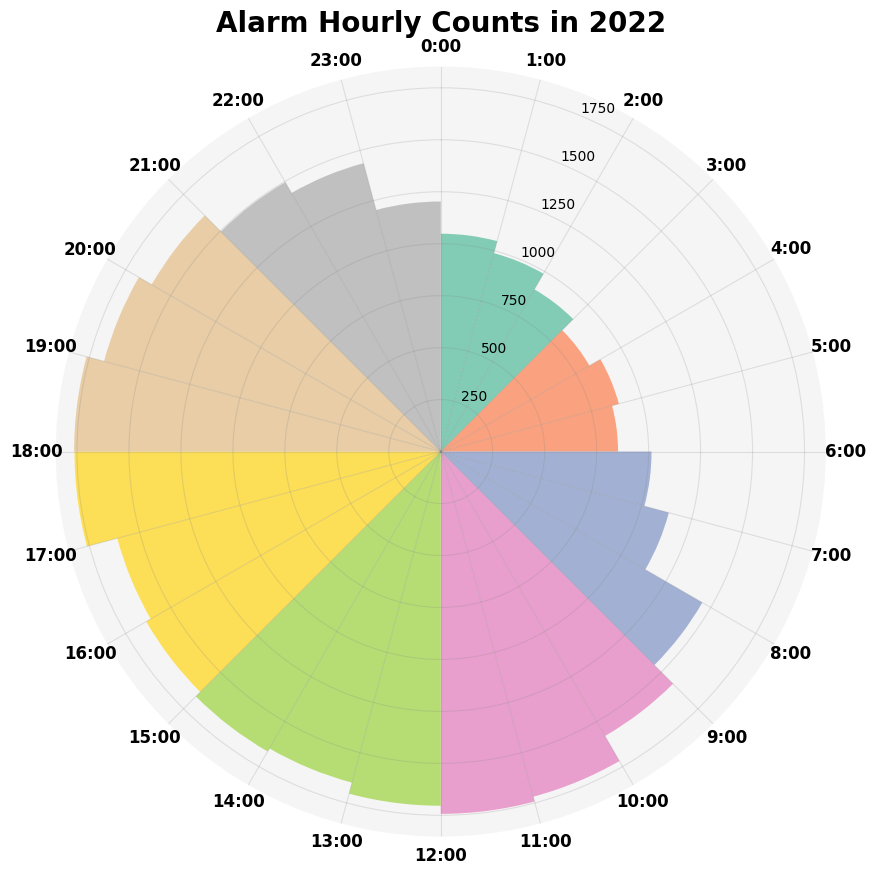

In [24]:

# Author-
# Ali Dadayev 


# Convert the alarm datetime column to datetime
df['Alarm DtTm'] = pd.to_datetime(df['Alarm DtTm'])

# Filter for the year 2022
df2 = df[df['Alarm DtTm'].dt.year == 2022]

# Group by hour and count number of alarms
hour_counts = df2.groupby(df2['Alarm DtTm'].dt.hour).size().reset_index(name='counts')

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))

colors = plt.cm.Set2(np.linspace(0, 1, len(hour_counts)))

bars = ax.bar(hour_counts['Alarm DtTm'] * 2 * np.pi / 24, hour_counts['counts'], 
              width=2*np.pi/24, align='edge', color=colors, alpha=0.8)

hours = np.arange(0, 24)
tick_labels = ['{}:00'.format(h) for h in range(24)]
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels(tick_labels, fontsize=12, color='black', fontweight='bold')
ax.set_title('Alarm Hourly Counts in 2022', fontsize=20, pad=25, fontweight='bold')


# Set the starting angle and direction
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Customize the grid and background
ax.grid(color='gray', alpha=0.2)
ax.set_facecolor('whitesmoke')

# Remove unnecessary borders
ax.spines['polar'].set_visible(False)
ax.spines['start'].set_visible(False)
ax.spines['end'].set_visible(False)
ax.spines['inner'].set_visible(False)


plt.show()





This plot visualizes the average arrival time of the San Francisco Fire Department by battalion and year. The plot is a line chart with a separate line for each battalion. The x-axis represents the year, and the y-axis represents the average arrival time in minutes. The plot is interactive, and hovering over a data point will display information about the battalion, the year, and the average arrival time.

This plot can be useful in identifying trends in the performance of different battalions over time. For example, if there is a particular battalion that consistently has a longer average arrival time than the others, it may indicate an issue that needs to be addressed. Conversely, if there is a battalion that consistently has a shorter arrival time, it could be studied to see if there are best practices that could be adopted by other battalions.

Overall, this plot provides insight into the performance of the San Francisco Fire Department, allowing researchers to identify areas for improvement and track the progress of any interventions made.